## Load and visualise Masks

This code visualizes a coco image, together with its labelled bounding boxes and its masks.

In [144]:
from collections import defaultdict # a dict that returns empty if key is not found
import os
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from PIL import Image

In [149]:
# define the cocoParser() class with methods. Use to load and retreive data
class COCOParser:

    def __init__(self, anns_file, images_dir):
        
        with open(anns_file, 'r') as f: # reads the annotation JSON file using json library and stored in the coco variable
            coco = json.load(f)
        
        self.images_dir = images_dir
        self.images_dict = {} # a dictionary that links an image id to the corresponding image information
        self.categories_dict = {} # a dictionary that links the category id to its category information
        self.annotations_dict = defaultdict(list) # a dictionary that links the annotation image_id to the corresponding annotation information
        self.image_info_dict = {} # a dictionary that links a filename to all the relevant info (height, width, segmentation, bbox, category_name)

        for image in coco['images']:
            self.images_dict[image['id']] = image
        for category in coco['categories']:
            self.categories_dict[category['id']] = category
        for annotation in coco['annotations']:
            annotation.update(self.categories_dict[annotation['category_id']])
            self.annotations_dict[annotation['image_id']].append(annotation)
        for image in coco['images']:
            self.image_info_dict[image['file_name']] = image
            
            self.image_info_dict[image['file_name']]['instances'] = self.annotations_dict[self.image_info_dict[image['file_name']]['id']]

        
    
    def get_infoIds(self, file_names):
        """
        takes file_names, which is a list of image file names, as an input parameter and returns all the info related.
        """
        return [self.image_info_dict[file_name] for file_name in file_names]
    
    def get_infoId(self, file_name):
        """
        takes file_name, which is a string containing image file name, as an input parameter and returns all the info related.
        """
        return self.image_info_dict[file_name]
    
    def plot_images_with_annotations(self, file_name):
        # Retrieve the image information and annotations
        image_info = self.get_infoId(file_name)
        image_path = os.path.join(self.images_dir, file_name)
        
        # Open the original image
        image = Image.open(image_path)
        
        # Create subplots for the original image, image with bounding boxes, and image with masks
        fig, axes = plt.subplots(1, 3, figsize=(20, 8))
        
        # 1. Plot the original image
        axes[0].imshow(image)
        axes[0].set_title("Original Image")
        axes[0].axis('off')
        
        # 2. Plot the image with bounding boxes
        axes[1].imshow(image)
        axes[1].set_title("Image with Bounding Boxes")
        axes[1].axis('off')
        for instance in image_info['instances']:
            bbox = instance['bbox']  # COCO format: [x, y, width, height]
            category_name = instance['name']
            rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
            axes[1].add_patch(rect)
            axes[1].text(bbox[0], bbox[1] - 5, category_name, color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.7))
        
        # 3. Plot the image with masks
        axes[2].imshow(image)
        axes[2].set_title("Image with Masks")
        axes[2].axis('off')
        for instance in image_info['instances']:
            segmentation = instance['segmentation']
            color = np.random.rand(3,)  # Random color for each mask
            if isinstance(segmentation, list):  # Handle polygons
                for poly in segmentation:
                    poly_np = np.array(poly).reshape((-1, 2))
                    axes[2].fill(poly_np[:, 0], poly_np[:, 1], color=color, alpha=0.5)
        
        plt.tight_layout()
        plt.show()

### Loading and visualizing

In [150]:
coco_annotations_instances_val_file="/home/maver02/Development/Datasets/COCO/annotations/instances_val2017.json"
coco_images_val_dir="/home/maver02/Development/Datasets/COCO/val2017"
coco= COCOParser(coco_annotations_instances_val_file, coco_images_val_dir)

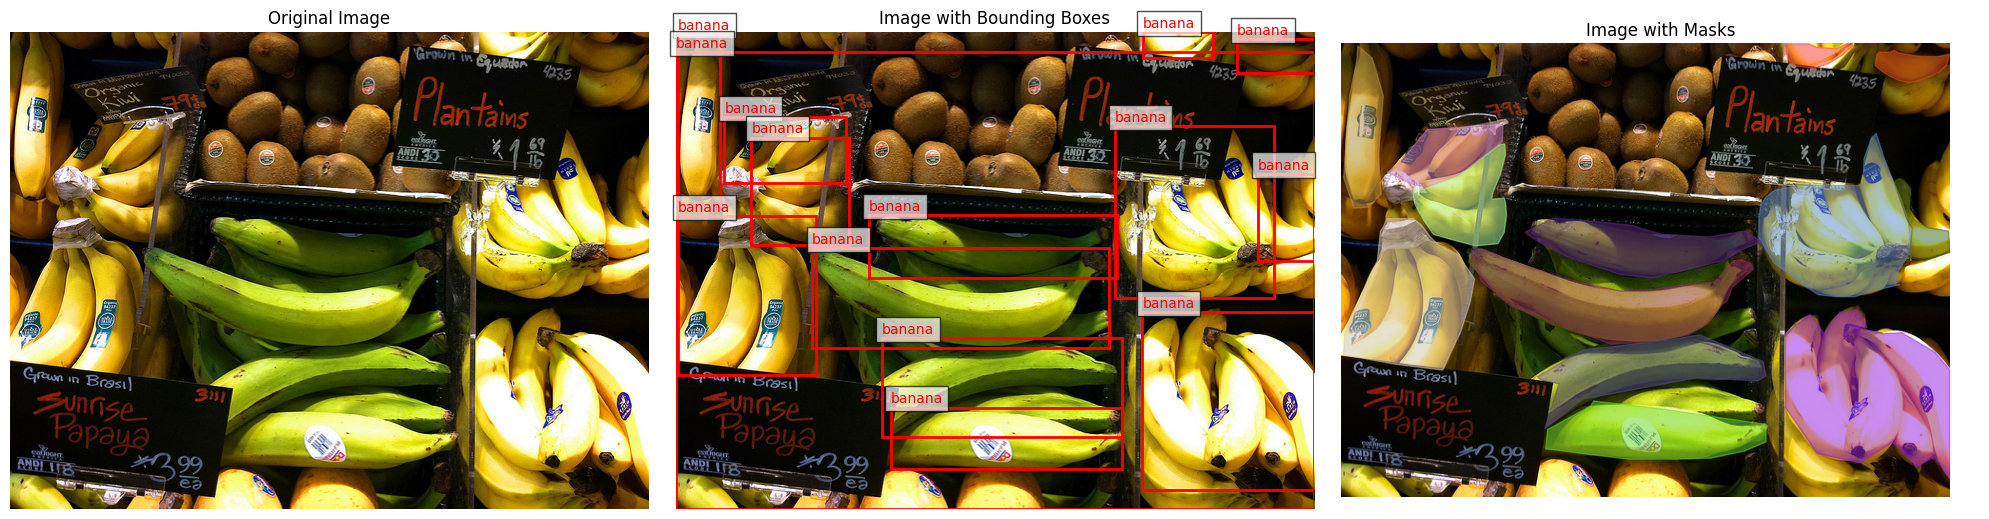

In [151]:

# Example usage
file_name = "000000581781.jpg"  # Replace with an image file name from your dataset
coco.plot_images_with_annotations(file_name)
